**ASSIGNMENT 1**

**25W Applied Machine Learning - 03**

In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd


mnist = pd.read_csv("mnist_test.csv")  


print(mnist.head())


   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0    0    0    0  ...      0      0   
1      2    0    0    0    0    0    0    0    0    0  ...      0      0   
2      1    0    0    0    0    0    0    0    0    0  ...      0      0   
3      0    0    0    0    0    0    0    0    0    0  ...      0      0   
4      4    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [5]:
print(mnist.info())  
print(mnist.describe())  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB
None
              label      1x1      1x2      1x3      1x4      1x5      1x6  \
count  10000.000000  10000.0  10000.0  10000.0  10000.0  10000.0  10000.0   
mean       4.443400      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.895865      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

           1x7      1x8      1x9  ...         28x19         28x20  \
count  10000.0  10000.0  10000.0  ...  10000.000000  10000.000000   
mean      

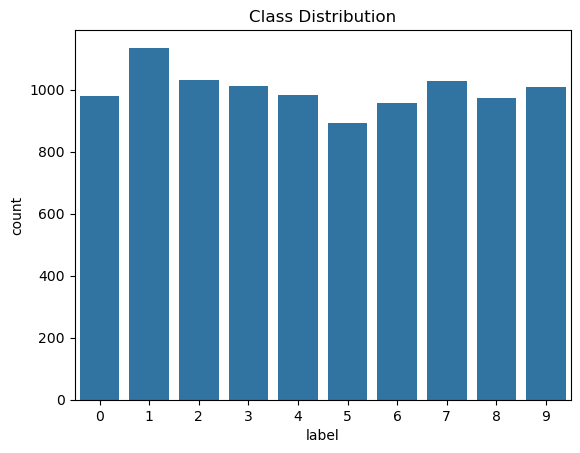

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=mnist['label'])
plt.title("Class Distribution")
plt.show()


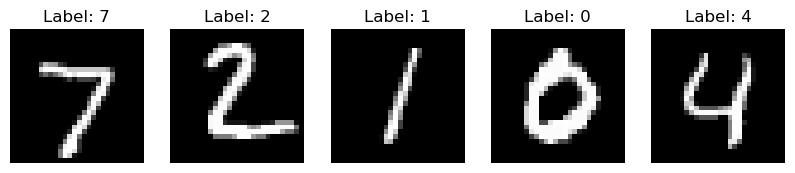

In [10]:
import numpy as np
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i, ax in enumerate(axes):
    img = mnist.iloc[i, 1:].values.reshape(28, 28)  
    ax.imshow(img, cmap="gray")
    ax.axis("off")
    ax.set_title(f"Label: {mnist.iloc[i, 0]}")
plt.show()


In [15]:
from sklearn.model_selection import train_test_split

X = mnist.iloc[:, 1:].values  
y = mnist.iloc[:, 0].values   


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [17]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       196
           1       0.97      0.99      0.98       227
           2       0.96      0.95      0.95       206
           3       0.95      0.95      0.95       202
           4       0.94      0.95      0.95       196
           5       0.99      0.92      0.95       178
           6       0.97      0.98      0.97       192
           7       0.96      0.94      0.95       206
           8       0.94      0.95      0.95       195
           9       0.94      0.96      0.95       202

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000

Accuracy: 0.9575


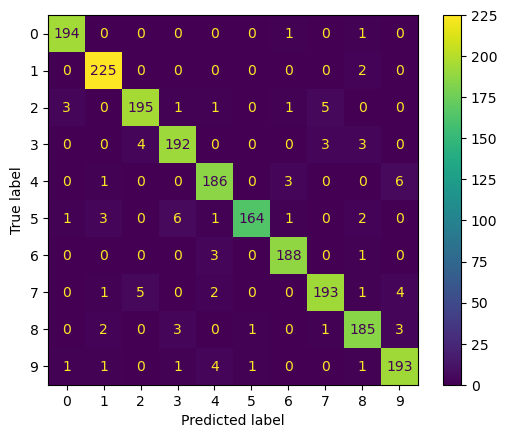

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()


In [32]:
import joblib


joblib.dump(rf_model, "random_forest_mnist.pkl")


['random_forest_mnist.pkl']